In [1]:
pip install openmm

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 20.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


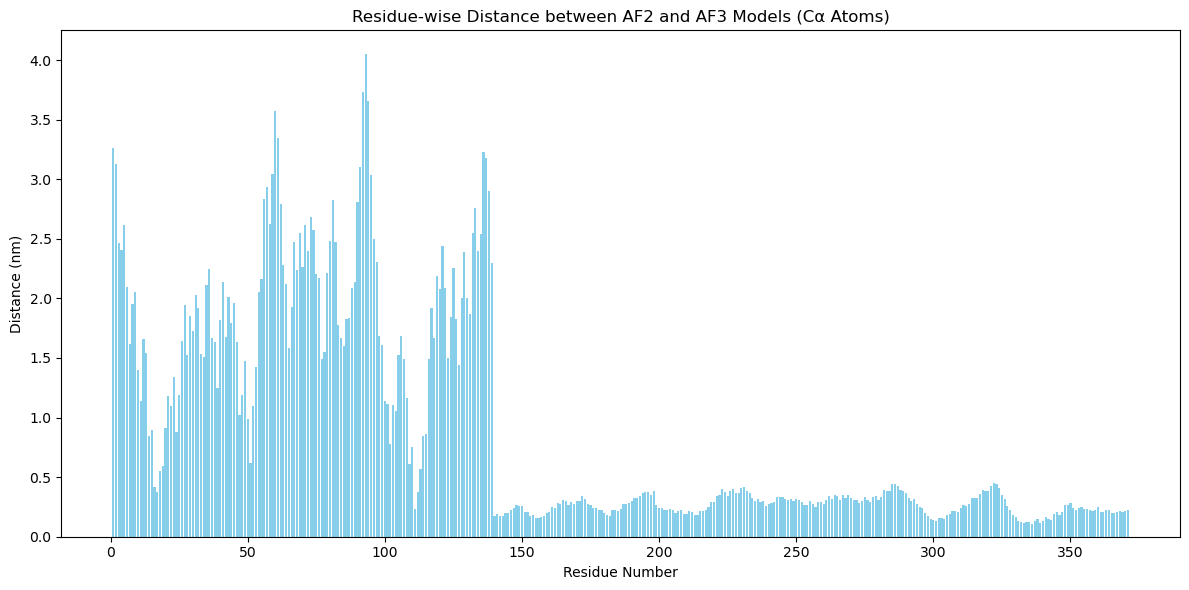

In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
# Load AF2 and AF3 structures
try:
    af2 = md.load('/home/yhp2008/comp-lab-class-2024/Week7-Alphafold/AF2/test_bc851_unrelaxed_rank_001_alphafold2_multimer_v3_model_4_seed_000.pdb')
    af3 = md.load('/home/yhp2008/comp-lab-class-2024/Week7-Alphafold/ATP_AF3/fold_atp_model_0.cif')
except Exception as e:
    print(f"Error loading files: {e}")
    exit()
# Select only Cα atoms for both structures
ca_atoms_af2 = af2.topology.select('name CA')
ca_atoms_af3 = af3.topology.select('name CA')
# Ensure there are Cα atoms to superpose
if len(ca_atoms_af2) == 0 or len(ca_atoms_af3) == 0:
    print("No Cα atoms found in one of the structures.")
    exit()
# Superpose AF3 onto AF2 using only Cα atoms
af3_aligned = af3.superpose(af2, atom_indices=ca_atoms_af3, ref_atom_indices=ca_atoms_af2)
# Compute residue-wise distance between AF2 and aligned AF3
distances = np.sqrt(np.sum((af2.xyz[0, ca_atoms_af2] - af3_aligned.xyz[0, ca_atoms_af3])**2, axis=1))
# Generate residue IDs
residue_ids = [residue.resSeq for residue in af2.topology.residues if residue.is_protein]
# Check that residue IDs match the number of distances
if len(residue_ids) != len(distances):
    print("Mismatch between residue IDs and distances.")
    exit()
# Plot the differences as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(residue_ids, distances, color='skyblue')
plt.xlabel('Residue Number')
plt.ylabel('Distance (nm)')
plt.title('Residue-wise Distance between AF2 and AF3 Models (Cα Atoms)')
plt.tight_layout()
plt.show()